# Содержание

[1. Описание проекта](#section_1)

[2. Изучение данных из файла](#section_2)

[2.1 Вывод](#section_2.1)

[3. Предобработка данных](#section_3)

[3.1 Вывод](#section_3.1)

[4. Анализ данных](#section_4)

[4.1 Вывод](#section_4.1)

[5. Портрет пользователя каждого региона](#section_5)

[6. Проверка гипотез](#section_6)

[7. Общие выводы](#section_7)

## Описание проекта
<a id='section_1'><a/>

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<br>Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.
<br>В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных из файла
<a id='section_2'><a/>

Импортируем библиотеки и считываем наши данные в переменную df.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
df = pd.read_csv('games.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Посмотрим кол-во пропусков в датасете

In [3]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Два пропуска в названии и в жанре. Совпадение? Не думаю. Выведем строки с пропусками в названии.

In [4]:
df[df['Name'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Что и требовалось доказать.

Пропуски в названии, годе релиза и жанре вы удалим, т.к. их очень мало. Пропуски в оценка заменим заглушкой. Пропуски в рейтинге отставим.

Рассмотрим каждый столбец по подробнее.

Начнем со столбоцв в которых хранятся данные в виде Object, кроме названий игр, т.к. названия нам не столь важны. Они выполняют роль id в каком то смысле.

Найдем все уникальные значения в столбцах и посмотрим кол-ва строк с определенными значениями.

In [5]:
display(df['Platform'].sort_values().unique())
display(df['Genre'].sort_values().unique())
display(df['Rating'].sort_values().unique())

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [6]:
display(df['Platform'].value_counts())
display(df['Genre'].value_counts())
display(df['Rating'].value_counts())


PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Никаких опечаток или дубликатов у нас не имеется. Сразу можно выделить платформы лидеры и жанры лидеры.

Если не быть сильно погруженным в сферу игр, можно сказать, что WiiU, может являться неявным дубликатом. Потому что  буквы U и I соседние на клавиатуре. Может лучше было бы писать название платформ так:

    PS_2, X_360, Wii_U

Теперь рассмотрим столбцы с цифровыми значениями с помощью функции describe

In [7]:
display(df['Year_of_Release'].describe())
display(df['Year_of_Release'].sort_values().unique())
display(df['Year_of_Release'].value_counts())

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

Посмотрим на столбцы с продажами

In [8]:
display(df['NA_sales'].describe())
display(df['EU_sales'].describe())
display(df['JP_sales'].describe())
display(df['Other_sales'].describe())

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_sales, dtype: float64

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: EU_sales, dtype: float64

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_sales, dtype: float64

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: Other_sales, dtype: float64

Никаких отрицательных значений не обнаруженно. Все со столбцами с продажами в порядке.

In [9]:
display(df['Critic_Score'].describe())
display(df['User_Score'].sort_values().unique())
display(df['User_Score'].value_counts())

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

Оценки критиков исопльзуют шкалу от 0 до 100. Когда оценки пользователей от 0 до 10, но у них есть дробная часть, что можно представить как шкалу от 0 до 100. Так же есть значение TBD, что означет что оценка требует уточнения. И тк это единственное значение, которое у нас состоит не из цифры, мы его заменим на nan, чтобы ничего не мешало нашей работе

### Вывод
<a id='section_2.1'><a/>

В таблице имеем 16715 строк и 11 столбцов. 
<br>Всю информацию приведем к нижнему регистру. Типы данных изменим в годе на datetime.
<br>Пропуски есть в столбцах с названием, годом релиза, жанром, оценками критиков и игроков и рейтингом. Пропуски в названии и в жанре совпали.
<br>Строки с пропусками в названиях, году выхода и жанром удалим.  Пропуски в рейтинге возможно из-за того, что там просто нет возрастных ограничений или заполним заглушкой. Пропуски в оценках могли появиться из-за ошибки загрузки в датасет. Заполнять какими-либо значениями неправильно, это повлияет на корреляцию. Предалагаю оставить пропуски. Но в оценках пользователей есть значение TBD, которое мы заменим на nan, чтобы могли изменить тип данных на float и работать с цифровыми данными.

Никаких дубликатов не обнаруженно. 

Всего мы удалим 271 строку, что никак не повлиляет на наше исследование.


## Предобработка данных
<a id='section_3'><a/>

Приведем строки и названия столбцов к нижнему регистру.


In [10]:
df.columns = df.columns.str.lower()
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Удалим строки с пропусками в названии, годе выпуска и жанре.

In [11]:
df = df.dropna(subset=['year_of_release'])
df = df.dropna(subset=['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Получилось, что в строке были и пропуски в жанре.

Рейтинг заполним заглушкой no_info.

In [13]:
df['rating'] = df['rating'].fillna('no_info')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


TBD Заменим тбд на пропуск, чтобы  в столбце были только цифры и пропуски. И сразу заменим типы данных на пропуски.

In [14]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')

In [15]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Добавим столбец с суммой продаж.

In [16]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,no_info,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no_info,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,no_info,0.01
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,no_info,0.01
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_info,0.01
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,no_info,0.01


### Вывод
<a id='section_3.1'><a/>

Мы провели обработку данных и привели их к рабочему формату.

Мы изменили все буквы на нижний регистр. Удалили строки с пропусками в названии, жанре и годе выпуска. Заполнили пропуски в рейтинге заглушкой. Пропуски в оценках решил оставить, т.к. думаю, что любые изменения сильно исказят данные.

Посчитали общие продажи каждого тайтла.

## Исследовательский анализ данных
<a id='section_4'><a/>

Построим график выпуска игр по году. Для этого создадим таблицу с данными по кол-ву выпущенных игр и году.

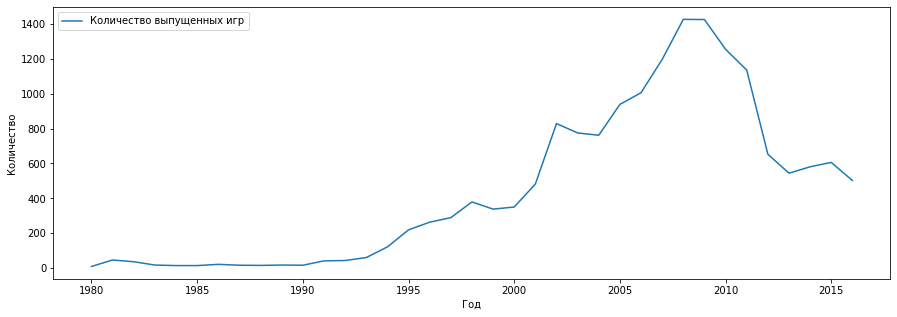

In [17]:
games_per_year = df.groupby(['year_of_release']).agg({'year_of_release': 'count'})
games_per_year.plot(figsize = (15,5))
plt.legend(['Количество выпущенных игр'])
plt.ylabel('Количество')
plt.xlabel('Год')
plt.show()

Видим, что пик у нас находится на 2009 году. До 2000 игры были еще не очень популярны, что и обьясняет малое кол-во игр. Так же есть падение после 2009 года, тогда появились первые смартфоны и возможно разработчики перешели на мобильные платформы.

Посмотрим на продажи игр.

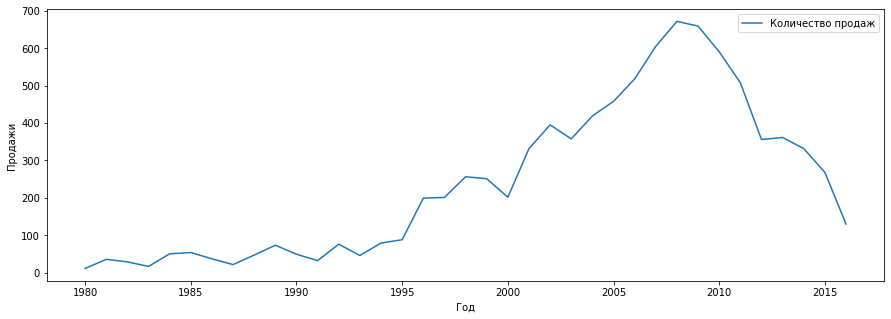

In [18]:
sales_per_year = df.groupby(['year_of_release']).agg({'all_sales': 'sum'})
sales_per_year.plot(figsize = (15,5))
plt.legend(['Количество продаж'])
plt.ylabel('Продажи')
plt.xlabel('Год')
plt.show()

График продаж также показываетс спад после 2009 года. Поэтому за акутальный период мы будем брать года с 2013 по 2016.

In [19]:
platform_sales = df.groupby(['platform']).agg({'all_sales': 'sum'})
platform_sales = platform_sales.sort_values(by=['all_sales'], ascending = False)
platform_sales

,all_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


Возьмем топ 10 платформ и создадим список с их названиями.

In [20]:
platform_sales_top10 = platform_sales.head(10).index
platform_sales_top10

Index(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', '3ds'], dtype='object', name='platform')

Построим сводную таблицу по топ платформам и продажам в год

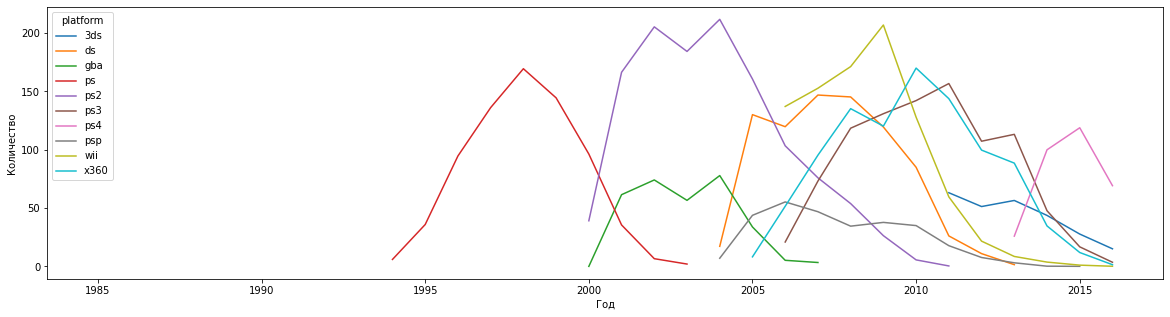

In [21]:
df.query('platform in @platform_sales_top10').pivot_table(index = 'year_of_release', columns = 'platform', values = 'all_sales', aggfunc = 'sum').plot(figsize = (20,5))
plt.ylabel('Количество')
plt.xlabel('Год')
plt.show()

По графику можно сказать, что продажи платформ идет вниз после начала продаж нового поколения. Это видно на примере ps и ps2, ps2 и ps3 и x360, далее вышла ps4. Нинтендо живет в своем мире, но у них продажи падали с выходом ps3 и x360.

PS2 так и никто не смог обойти за 15 лет по кол-ву продаж. На втором месте Х360

Узнаем среднюю продолжительность жизни платформы.

In [22]:
def average_lifetime_platforms(platform_name_list):
    count_lifetime = 0
    for i in platform_name_list:
        only_one_platform = df[df['platform']==i]
        lifetime = only_one_platform['year_of_release'].max() - only_one_platform['year_of_release'].min()
        count_lifetime += lifetime
    alp = count_lifetime / len(platform_name_list)
    return alp

In [23]:
display(average_lifetime_platforms(platform_sales_top10))

10.5

Посмотрим, какая средняя продолжительность жизни среди всех платформ.

In [24]:
platform_names = platform_sales.index
display(average_lifetime_platforms(platform_names))

7.612903225806452

Средняя продолжительность жизни платформы 10.5 для платформ из списка с топ продажами и 7.6 для всех платформ.

Актуальный период у нас будет 2013, 2014 и 2015 год.

Возьмем топ 5 платформ по продажам для дальнейшей работы. У нас это 'ds', 'wii', 'ps3', 'x360', 'ps2'.

In [25]:
platform_sales_top10

Index(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', '3ds'], dtype='object', name='platform')

In [26]:
top_5_platform = platform_sales_top10[:5]
top_5_platform

Index(['ps2', 'x360', 'ps3', 'wii', 'ds'], dtype='object', name='platform')

Оставим данные только за 2013, 2014 и 2015 года.

In [27]:
actual_years = [2013, 2014, 2015]
df = df.query('year_of_release in @actual_years')

Посмотрим актуальные данные по продажам

In [28]:
platform_sales = df.groupby(['platform']).agg({'all_sales': 'sum'})
platform_sales = platform_sales.sort_values(by=['all_sales'], ascending = False)
platform_sales

,all_sales
platform,
ps4,244.89
ps3,177.83
x360,135.28
xone,133.17
3ds,128.11
wiiu,60.03
pc,34.18
psv,28.74
wii,13.48


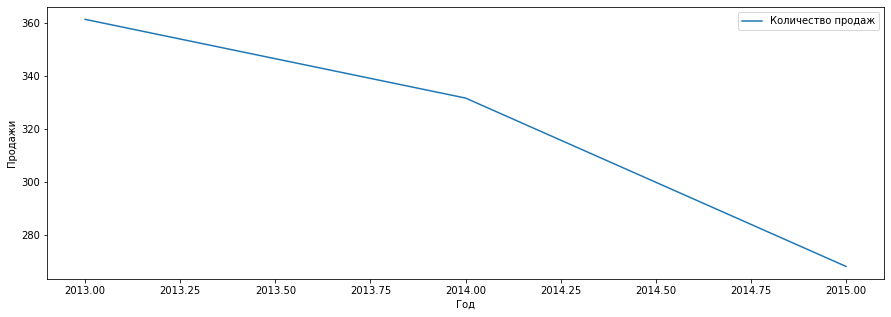

In [29]:
sales_per_year = df.groupby(['year_of_release']).agg({'all_sales': 'sum'})
sales_per_year.plot(figsize = (15,5))
plt.legend(['Количество продаж'])
plt.ylabel('Продажи')
plt.xlabel('Год')
plt.show()

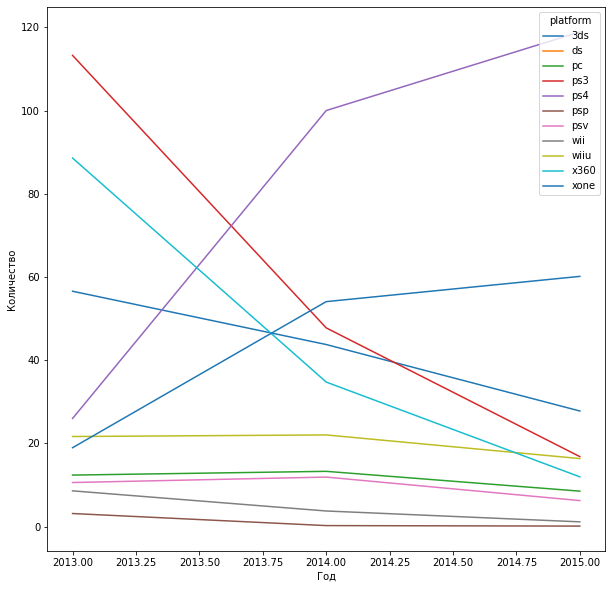

In [30]:
df.query('platform in @platform_sales.index').pivot_table(index = 'year_of_release', columns = 'platform', values = 'all_sales', aggfunc = 'sum').plot(figsize = (10,10))
plt.ylabel('Количество')
plt.xlabel('Год')
plt.show()

Видим, что продажи только у PS4 и XONE растут продажи, остальные падают.

PS4 и XONE являются потенциально прибыльными платформами.

In [31]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,759.000000,930.000000,1731.000000
mean,2014.035817,0.226909,0.197002,0.070173,0.060942,71.677207,6.571828,0.555026
std,0.814528,0.602921,0.547053,0.255457,0.180693,13.146521,1.590649,1.344502
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,65.000000,5.700000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,74.000000,6.900000,0.140000
75%,2015.000000,0.185000,0.155000,0.060000,0.050000,81.000000,7.700000,0.480000
max,2015.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

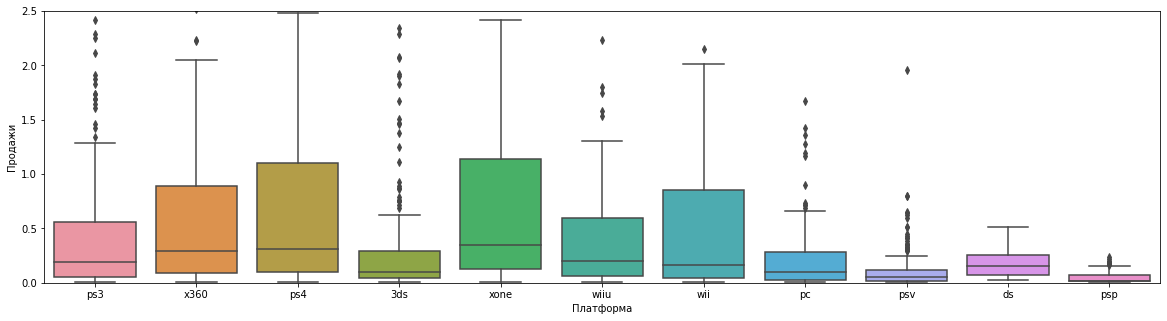

In [32]:
plt.figure(figsize=(20,5))
plt.ylim(0, 2.5)
sns.boxplot(data=df, x='platform', y='all_sales')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

PS4 и XONE  идут очень ровно, что и не удивительно, т.к. они являются прямыми конкурентами. Что еще может сказать ящик с усами?

Посмотрим на влияние оценок на продажи внутри одной платформы.

In [33]:
ps4 = df.query('platform in "ps4"')
print('Корреляция между продажами и оценкой пользователей для PS4 равна:', ps4['user_score'].corr(ps4['all_sales']))
print('Корреляция между продажами и оценкой критиков для PS4 равна:', ps4['critic_score'].corr(ps4['all_sales']))

Корреляция между продажами и оценкой пользователей для PS4 равна: 0.024230832360622585
Корреляция между продажами и оценкой критиков для PS4 равна: 0.4318482049982005


Построим диаграммы рассеяния для оценок

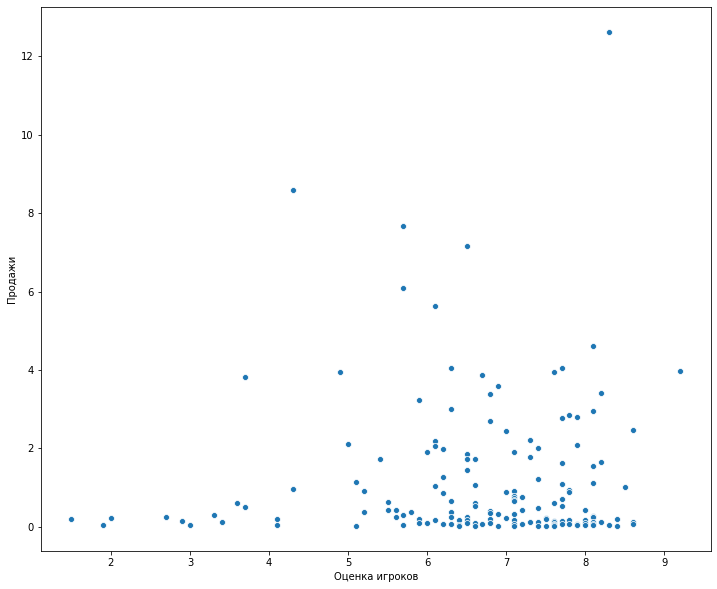

In [34]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=ps4,x='user_score', y='all_sales')
plt.xlabel('Оценка игроков')
plt.ylabel('Продажи')
plt.show()

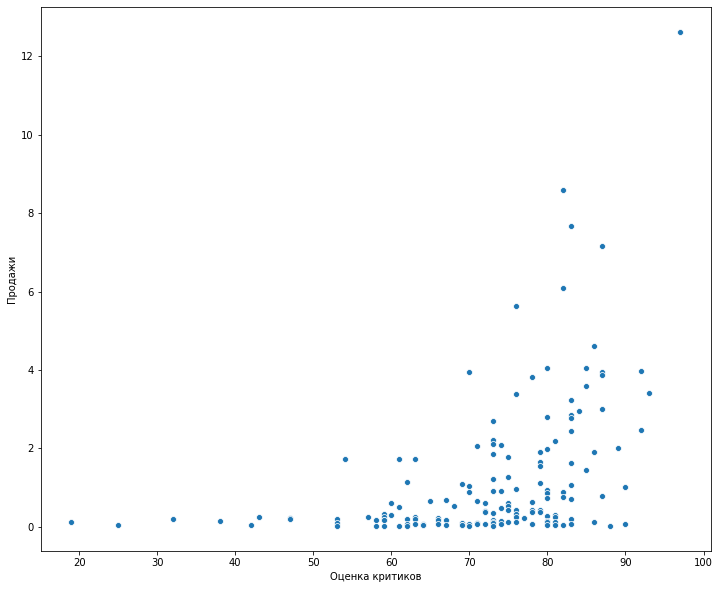

In [35]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=ps4,x='critic_score', y='all_sales')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

Продажи сильнее зависят от оценок критиков, чем других пользователей. Люди больше доверяют отдельным изданиям и личностям, чем таким же игрокам. Но так же видим, что распределение оценок на графиках выглядит очень похоже. Такой же вывод мы можем сделать и для платформы XONE, тк они очень похожи по своим данным.

Рассмотрим распределение по жанрам.

In [37]:
genre_sales = df.groupby(['genre']).agg({'all_sales': 'sum'}).sort_values(by=['all_sales'],ascending = False).reset_index()
genre_sales

,genre,all_sales
0,action,291.76
1,shooter,194.76
2,role-playing,127.71
3,sports,127.16
4,misc,60.22
5,platform,39.40
6,racing,37.10
7,fighting,30.84
8,simulation,19.87
9,adventure,19.82


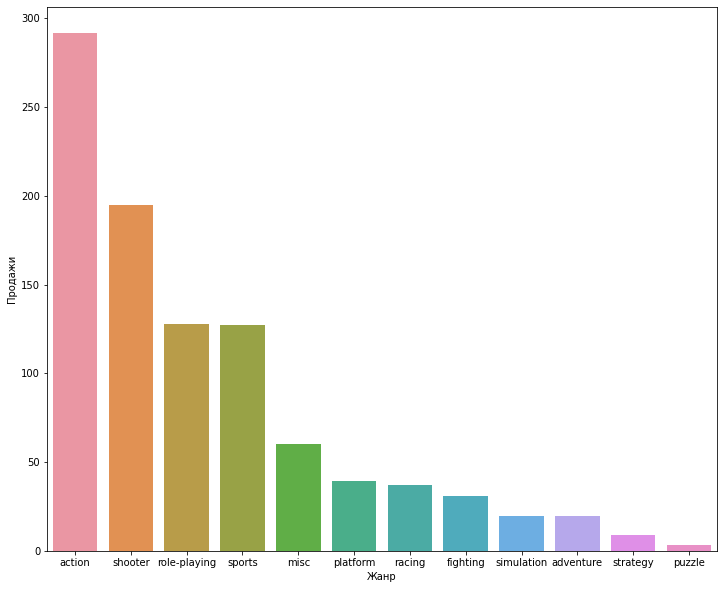

In [38]:
plt.figure(figsize=(12,10))
sns.barplot(data=genre_sales, x='genre', y='all_sales')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

Понятно, что в первой тройке у нас экшн, шутеры и спортсимуляторы с рпг, как самые популярные жанры. Стратегии и пазлы на последних местах

### Вывод
<a id='section_4.1'><a/>

Рост игр на консолях и пк был особо заметен с 2000 по 2009 год. До 2000 пк и консоли были не особо доступны и популярны, что и объясняет медленный рост. После 2009 спад кол-ва выходящих игр. Возможно из-за выхода смартофонов. Соотвественно ведут себя и продажи игр. Под акктульаный период мы взяли 2013, 2014 и 2015 года.

Когда выходит новое поколение консолей, у старых сразу падают продажи. Только консоли нинтендо никак не связаны с PS или ХВОХ из-за своей специфической аудитории. Первенство продаж принадлежит PS2 и за 15 лет никто не смог побить её рекорд. На втором месте Х360. Топ 5 платформ по продажам 'ds', 'wii', 'ps3', 'x360', 'ps2'. Средняя продолжительность жизни топовых платформ 10.5 лет. Средняя продолжительность жизни всех платформ 7.6 лет. 

В актуальный период рост показывают консоли последних поколений это XONE и PS4. У остальных платформ популярность падает. у XONE и PS4 распределение очень похожи. PS4 лидирует по продажам.

Продажи сильнее зависят от оценок критиков, чем других пользователей. Люди больше доверяют отдельным изданиям и личностям, чем таким же игрокам.

Самые популярные жанры экшн, шутеры и спортсимуляторы с рпг. Самые непопулярные пазлы, аднвентуры и стратегии. Популярность экшнов, спортсимуляторов и шутеров можно связать с природой человека, что людям интереснее что-то динамичнее и быстрее, чем то, где надо сидеть и продумывать ходы по немного.

## Портрет пользователя каждого региона
<a id='section_5'><a/>

Разделим наш датафрейм на три части по аудиториям NA, EU, JP. Построим круговой, чтобы понять общую долю среди топ 5 платформ. Для этого напишем функцию

In [39]:
region_list = ['na_sales', 'eu_sales', 'jp_sales']

In [40]:
def regional_platform_preferences(region):
    region_platform = df.groupby(['platform']).agg({region: 'sum'}).sort_values(by=[region],ascending = False)
    top5_region_platform = region_platform.head(5)
    top5_region_platform.plot.pie(y=region, figsize=(7,7))
    plt.show()

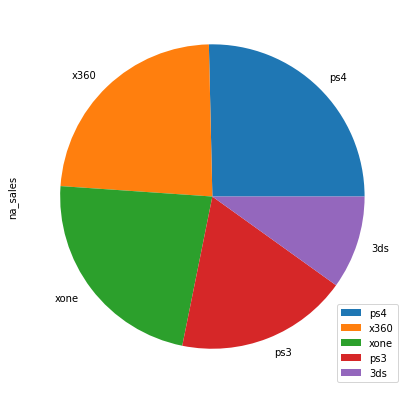

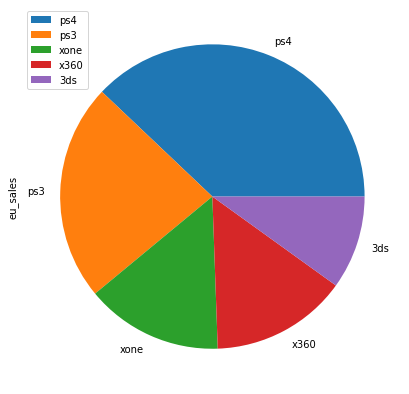

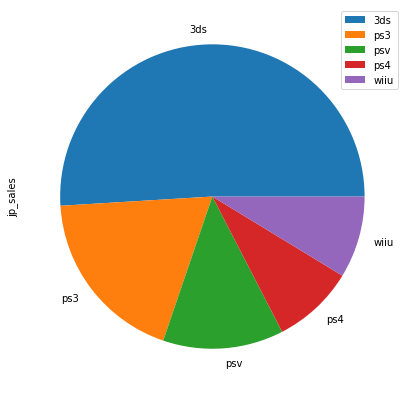

In [41]:
for i in region_list:
    regional_platform_preferences(i)

В Америке половину рынка занимает иксбокс. Вторую половину занимают японские консоли. Лидирует ps4.

В Европе уже больше половины рынка у плейстешн. Иксбоксу достается только одна четверть рынка. Лидирует также ps4.

В Японии половина рынка принадлежит одной платформе это 3ds. Оставшуюся половину делят 3 платформы от сони и 1 от той же нинтендо. Платформ от майкрософт совсем нет и для них это большая боль)

In [42]:
def regional_genre_preferences(region):
    region_genre = df.groupby(['genre']).agg({region: 'sum'}).sort_values(by=[region],ascending = False)
    top5_region_genre = region_genre.head(5)
    top5_region_genre.plot.pie(y=region, figsize=(8,8))
    plt.show()

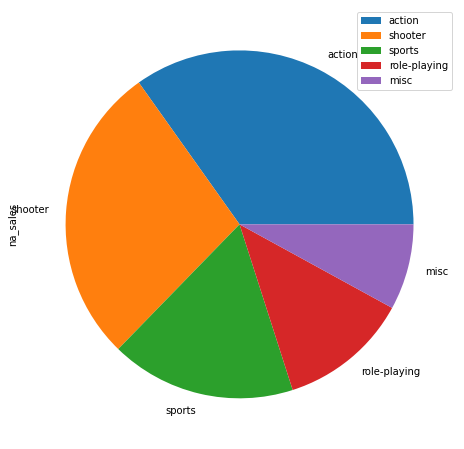

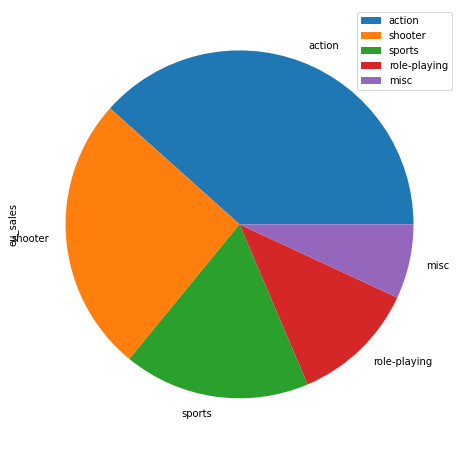

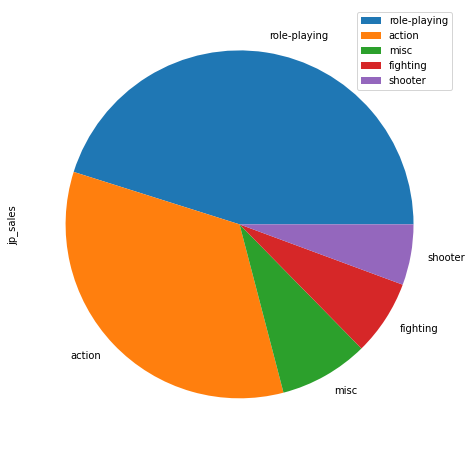

In [43]:
for i in region_list:
    regional_genre_preferences(i)

Топ пять жанров в Америке экшн, спортсимуляторы, шутеры, рпг и другое. Больше половины продаж это шутеры и экшн.

Жанровые предпочтения Европы точно копируют предпочтения Америки

Топ пять жанров в Японии РПГ, экшн, файтинги и шутеры и другое. Тут уже в лидеры вышли рпг. РПГ и экшн, забрали больше 75% рынка.

Посмотрим как зависят продажи игр в регионах от рейтинга ESRB . Сгрупируем по рейтингу ESRB  и вместо суммы будем использовать медиану, как функцию, по который мы будем строить выводы.

In [51]:
na_esrb = df.groupby(['rating']).agg({'na_sales': {'sum', 'median'}})
eu_esrb = df.groupby(['rating']).agg({'eu_sales': {'sum', 'median'}})
jp_esrb = df.groupby(['rating']).agg({'jp_sales': {'sum', 'median'}})

display(na_esrb)
display(eu_esrb)
display(jp_esrb)

na_sales        
          median     sum
rating                  
E          0.080   71.08
E10+       0.165   50.43
M          0.180  149.54
T          0.050   40.84
no_info    0.000   80.89

eu_sales        
          median     sum
rating                  
E           0.08   69.75
E10+        0.12   38.88
M           0.15  128.78
T           0.04   32.16
no_info     0.00   71.44

jp_sales       
          median    sum
rating                 
E           0.00  14.07
E10+        0.00   5.44
M           0.00  12.91
T           0.02  18.32
no_info     0.02  70.73

In [52]:
df_yes_info = df[df['rating']!='no_info']
jp_esrb = df_yes_info.groupby(['rating']).agg({'jp_sales': 'sum'}).sort_values(by=['jp_sales'],ascending = False)
jp_esrb

,jp_sales
rating,
T,18.32
E,14.07
M,12.91
E10+,5.44


Топ рейтингов в Японии по сумме продаж:E, T и М.

### Вывод
<a id='section_5.1'><a/>

В Америке по четверти рынка у PS2 и X360. Остальную половину делят wii, PS3 и DS. Топ пять жанров в Америке экшн, спортсимуляторы, шутеры, платформеры и другое. Половина продаж из топ 5 приходятся на экшн и спортсимуляторы. Топ рейтингов в Америке: AO, K-A и EC

В Европе по четверти рынка у PS2 и PS3. Остальную половину делят wii, X360 и ps. Топ пять жанров в Европе экшн, спортсимуляторы, шутеры, гонки и другое. Половина продаж из топ 5 приходятся на экшн и спортсимуляторы. Топ рейтингов в Европе: AO, K-A и M.

В Японии по четверти рынка у ds и ps. Остальную половину делят snes, 3ds и ps2. Топ пять жанров в Японии РПГ, экшн, спортсимуляторы, платформеры и другое. Топ рейтингов в Японии по сумме продаж:E, T и М.

Европа и Америка очень похожи, как рынки в геймдеве. Япония отличается от них по фсем факторам.

## Проверка гипотез
<a id='section_6'><a/>

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза звучит так: средние пользовательские рейтинги платформ Xbox One и PC равны

Альтернативная гипотеза звучит так: средние пользовательские рейтинги платформ Xbox One и PC не равны

Статистический метод будем использовать st.ttest_ind. alpha установим 0.05

In [46]:
xb = df.query('platform == "xone"')['user_score']
pc = df.query('platform == "pc"')['user_score']

In [47]:
alpha = 0.05 #критический уровень статистической значимости, если p-value окажется меньше него - отвергаем гипотезу

results = st.ttest_ind(xb.dropna(), pc.dropna())

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2827494983260732
Не получилось отвергнуть нулевую гипотезу


Мы не смогли отвергнуть нулевую гипотезу.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза звучит так: средние пользовательские рейтинги жанров Action и Sports равны

Альтернативная гипотеза звучит так: средние пользовательские рейтинги жанров Action и Sports не равны

In [48]:
action = df.query('genre == "action"')['user_score']
sports = df.query('genre == "sports"')['user_score']

In [49]:
alpha = 0.05 #критический уровень статистической значимости, если p-value окажется меньше него - отвергаем гипотезу

results = st.ttest_ind(action.dropna(), sports.dropna())

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.1579892916741545e-26
Отвергаем нулевую гипотезу


Мы смогли отвергнуть нулевую гипотезу.

## Общий вывод
<a id='section_7'><a/>

Перед анализом мы подготовили наши данные:
<br/>Всю информацию привели к нижнему регистру. 
<br/>Удалили пропуски или заполнили их заглушкой.

Рост игр на консолях и пк был особо заметен с 2000 по 2009 год. До 2000 пк и консоли были не особо доступны и популярны, что и объясняет медленный рост. После 2009 спад кол-ва выходящих игр. Возможно из-за выхода смартофонов. Соотвественно ведут себя и продажи игр. Под акктульаный период мы взяли 2013, 2014 и 2015 года.

Когда выходит новое поколение консолей, у старых сразу падают продажи. Только консоли нинтендо никак не связаны с PS или ХВОХ из-за своей специфической аудитории. Первенство продаж принадлежит PS2 и за 15 лет никто не смог побить её рекорд. На втором месте Х360. Топ 5 платформ по продажам 'ds', 'wii', 'ps3', 'x360', 'ps2'. Средняя продолжительность жизни топовых платформ 10.5 лет. Средняя продолжительность жизни всех платформ 7.6 лет.

В актуальный период рост показывают консоли последних поколений это XONE и PS4. У остальных платформ популярность падает. у XONE и PS4 распределение очень похожи. PS4 лидирует по продажам.

Продажи сильнее зависят от оценок критиков, чем других пользователей. Люди больше доверяют отдельным изданиям и личностям, чем таким же игрокам.

Самые популярные жанры экшн, шутеры и спортсимуляторы с рпг. Самые непопулярные пазлы, аднвентуры и стратегии. Популярность экшнов, спортсимуляторов и шутеров можно связать с природой человека, что людям интереснее что-то динамичнее и быстрее, чем то, где надо сидеть и продумывать ходы по немного.

В Америке половину рынка занимает иксбокс. Вторую половину занимают японские консоли. Лидирует ps4.
В Европе уже больше половины рынка у плейстешн. Иксбоксу достается только одна четверть рынка. Лидирует также ps4.
В Японии половина рынка принадлежит одной платформе это 3ds. Оставшуюся половину делят 3 платформы от сони и 1 от той же нинтендо. Платформ от майкрософт совсем нет.

Топ пять жанров в Америке экшн, спортсимуляторы, шутеры, рпг и другое. Больше половины продаж это шутеры и экшн.
Жанровые предпочтения Европы точно копируют предпочтения Америки
Топ пять жанров в Японии РПГ, экшн, файтинги и шутеры и другое. Тут уже в лидеры вышли рпг. РПГ и экшн, забрали больше 75% рынка.

Отвергли гипотезу, что  средние пользовательские рейтинги жанров Action и Sports равны. И не смогли отвегнуть гипотезу средние пользовательские рейтинги платформ Xbox One и PC равны.